In [357]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## buscar la funcion que me muestra los scatter plots ordenados en color (está en deivmod)


## Tema de segmentación de imagenes. Mirar qué algoritmos existen para segmentar una imagen

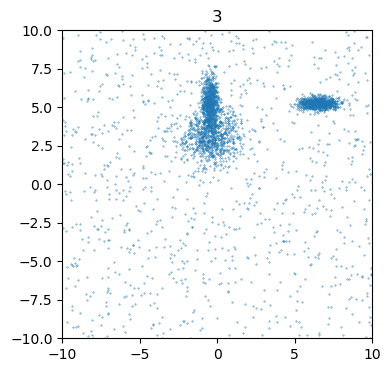

In [426]:
def get_data(n_groups):
    n_samples = np.random.randint(100, 1000)
    X = []
    X.append(np.random.uniform(-10,10,(1000, 2)))
    if n_groups:
        for _ in range(n_groups):
            mean = np.random.uniform(-10, 10, 2)
            cov = np.diag(np.random.uniform(0.01, 1, size=2))
            group_data = np.random.multivariate_normal(mean, cov, n_samples)
            X.append(group_data)
        
    X = np.vstack(X)
    X = X[(X[:, 0] >= -10) & (X[:, 0] <= 10) & (X[:, 1] >= -10) & (X[:, 1] <= 10)]

    return X, n_groups

X, n_groups = get_data(np.random.randint(0, 10))

f, ax = plt.subplots(figsize=(4,4))
ax.scatter(X[:,0], X[:,1], s = .1)
ax.set_xlim(-10,10)
ax.set_ylim(-10,10)
ax.set_title(str(n_groups))
plt.show()


## DBSCAN algoritmo

Número de grupos encontrados: 3


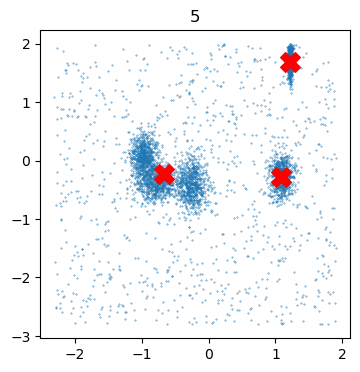

In [451]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler


X, n_groups = get_data(np.random.randint(0, 10))

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
dbscan = DBSCAN(eps=0.1, min_samples=20)

dbscan.fit(X_scaled)

labels = dbscan.labels_

num_clusters = len(set(labels)) - (1 if -1 in labels else 0)

print(f"Número de grupos encontrados: {num_clusters}")

centroids = []
for label in set(labels):
    if label != -1:  # Excluir el ruido
        cluster_points = X_scaled[labels == label]
        centroid = np.mean(cluster_points, axis=0)
        centroids.append(centroid)

f, ax = plt.subplots(figsize=(4,4))
ax.scatter(X_scaled[:,0], X_scaled[:,1], s = .1)
for cent in centroids:
    ax.scatter(cent[0], cent[1], s=200, c='red', marker='X', label='Centroides')

ax.set_title(str(n_groups))
plt.show()